## TALLER 1 ECUACIONES DIFERENCIALES Y MÉTODOS NUMÉRICOS - FORMA A
* Nombre: John Serrano Carrasco 
* Sección: 13307-A-1
* Profesor de Teoría: Jarnishs Beltran
* Profesor de Laboratorio: Eduardo Díaz

## PROBLEMA 2
Considere el PVI dado por: $$ y'-\frac{y}{x} = 1 ; y(1) = 2.$$


### a)  Determine una aproximación de y(10) utilizando el método de Euler mejorado considerando h = 0, 2.


Método de Euler Mejorado:
Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}^*= y_i +h f(x_i , y_i) $ <br>
*    $y_{i+1} = y_i + \dfrac{h}{2} \left[ f(x_i , y_i) + f(x_{i+1}, y_{i+1}^*) \right] $ <br>

In [1]:
# Se importa Matplotlib.pyplot como plt para trabajar con graficos
import matplotlib.pyplot as plt
# Se importa numpy como np para trabajar con arreglos
import numpy as np


In [2]:
# Primero, debemos definir el Metodo de Euler (o Metodo de Runge Kutta de Orden 2) para poder trabajar con este.
# Se utiliza el codigo desarrollado en clases, el cual traduce el algoritmo visto en clases.
def RK2(f, x0, xn, y0, n):
    X=np.linspace(x0, xn, n+1)
    Y=np.linspace(x0, xn, n+1)
    Y[0]=y0
    h=(xn - x0)/n
    
    for i in range(n):
        Y[i+1] = Y[i]+(h/2)*(f(X[i],Y[i])+f(X[i+1], Y[i]+h*f(X[i], Y[i])))
    
    salida = dict() # Se crea un diccionario, esto hara que sea mas facil graficar la informacion obtenida.
    salida['x'] = X
    salida['y'] = Y
    
    return salida


In [3]:
def f_1(X,Y): return (1 + (Y/X)) # Se define la funcion del enunciado
RK2(f_1, 1, 10, 2, 45) # Se llama al metodo de Euler Mejorado. 
# Notar que: x0 = 1 ; xn = 10 ; y0 = 2; n = 45 (n = 45 debido a h= 0.2, pues se despeja n de h = (xn-x0)/n)


{'x': array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
         5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
         7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
         9.8, 10. ]),
 'y': array([ 2.        ,  2.61666667,  3.26706349,  3.94628685,  4.65068382,
         5.37742646,  6.12426002,  6.88934426,  7.67114859,  8.4683798 ,
         9.27993074, 10.10484279, 10.94227781, 11.79149677, 12.65184308,
        13.52272956, 14.40362794, 15.29406044, 16.19359283, 17.10182876,
        18.01840495, 18.94298731, 19.87526744, 20.81495989, 21.76179959,
        22.7155398 , 23.67595027, 24.6428156 , 25.61593389, 26.59511549,
        27.58018191, 28.57096489, 29.5673055 , 30.56905345, 31.57606633,
        32.58820905, 33.6053533 , 34.62737702, 35.65416396, 36.68560329,
        37.72158922, 38.76202067, 39.80680096, 40.8558375 , 41.9090416 ,
        42.9663

#### La aproximación de y(10) utilizando el Metodo de Euler Mejorado es 42,966328162513..

### b) Determine una aproximacion de y(10) utilizando el metodo de Runge Kutta de orden 4 considerando h = 0, 5.

Método de Runge Kutta de Orden 4: 
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

In [4]:
# Primero, debemos definir el Metodo de Runge Kutta de Orden 4 para poder trabajar con este.
# Se utiliza el codigo desarrollado en clases, el cual traduce el algoritmo visto en clases.
def RK4(f, x0, xn, y0, n):
    X=np.linspace(x0, xn, n+1)
    Y=np.linspace(x0, xn, n+1)
    Y[0]=y0
    h=(xn - x0)/n
    
    for i in range(n):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+ (h/2),Y[i]+(h/2)*K1)
        K3 = f(X[i]+(h/2), Y[i]+(h/2)*K2)
        K4 = f(X[i]+h, Y[i]+h*K3)
        Y[i+1]=Y[i]+(h/6)*(K1+2*K2+2*K3+K4)
        
    ret = dict() # Se crea un diccionario. Esto hara que sea mas facil graficar la informacion obtenida.
    ret['x'] = X
    ret['y'] = Y
    
    return ret


In [5]:
RK4(f_1, 1, 10, 2, 18) # Se llama al Metodo de Runge Kutta de Orden 4
# Notar que: x0 = 1 ; xn = 10 ; y0 = 2; n = 18 (n = 18 debido a h= 0.5, pues se despeja n de h = (xn-x0)/n)


{'x': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 'y': array([ 2.        ,  3.60777778,  5.38562547,  7.28985077,  9.29476766,
        11.38341378, 13.54373612, 15.76672364, 18.04538238, 20.37412525,
        22.74838577, 25.16436151, 27.61883693, 30.10905716, 32.63263552,
        35.1874843 , 37.77176187, 40.38383154, 43.02222919])}

#### La aproximación de y(10) utilizando el Método de Runge Kutta de Orden 4 es 43.02222919019276..

### c)  Encuentre la solución exacta explícita del PVI.

Para resolver el PVI, podemos utilizar el Método de Variable Separables:
$$ \dfrac{dy}{dx} = 1 + \frac{y}{x} $$
Utilizamos el cambio de variable: $$ z =\frac{y}{x}$$
Derivamos para obtener el equivalente a $\dfrac{dy}{dx}$:
$$ \dfrac{dy}{dx} = x\dfrac{dz}{dx} + z $$
Ahora, nuestra ecuación queda de la siguiente manera:
$$  x\dfrac{dz}{dx} + z = 1 + z $$
Dejando un solo tipo de variable en cada lado:
$$ dz = \dfrac{dx}{x}  $$
Integrando en ambos lados:
$$ \int dz = \int \dfrac{dx}{x} $$

$$ z = \ln |x| + C $$
Volviendo a las variables originales:
$$ \frac{y}{x} = \ln |x| + C $$
$$ y = x(\ln |x| + C) $$

Ahora debemos obtener el de la constante $C$, utilizando la información dada por el PVI: $y(1) = 2$. Reemplazando:
$$ 2 = 1(\ln |1| + C)$$
Considerando que  $\ln |1| = 0$:
$$ 2 = C$$

#### Por lo tanto, la solución exacta explicita de la EDO considerando la información dada por el PVI es:
#### $$ y = x(\ln |x| + 2) $$

### d) Grafique en un mismo plano, la solución explícita y cada una de las aproximaciones encontradas en (a) y (b). Establezca a partir de éste, cuál de las aproximaciones tiene un error global más pequeño.

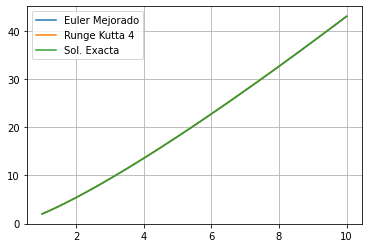

In [6]:
eulerM = RK2(f_1, 1, 10, 2, 45) # Se llama al Metodo de Euler Mejorado
X1 = eulerM['x'] # Se guarda el arreglo X
Y1 = eulerM['y'] # Se guarda el arreglo Y
plt.plot(X1,Y1, label = "Euler Mejorado") # Se grafica el Metodo de Euler Mejorado

runge = RK4(f_1, 1, 10, 2, 18)  # Se llama al Metodo de Runge Kutta de Orden 4
X2 = runge['x'] # Se guarda el arreglo X
Y2 = runge ['y'] # Se guarda el arreglo Y
plt.plot(X2,Y2, label = "Runge Kutta 4") # Se grafica el Metodo de Runge Kutta de Orden 4

x = np.linspace (1,10,100) # Se crea un arreglo de 1 hasta 10 con 100 numeros
y = x * (np.log(x) +2) # Se define la solucion exacta

plt.plot(x,y, label = "Sol. Exacta") # Se grafica la solucion exacta

plt.legend() # Se aplican las labels para identificar las graficas realizadas
plt.grid() # Se agrega una malla de cuadros al fondo del grafico


Notese que el gráfico anterior no nos permité ver con claridad el error de los metodos utilizados con la solución exacta. Vamos a hacer un zoom:

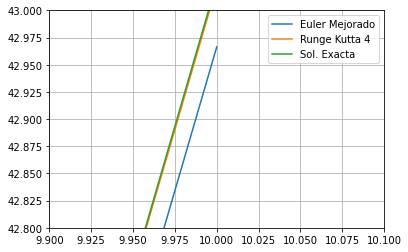

In [7]:
plt.plot(X1,Y1, label = "Euler Mejorado") # Se grafica el Metodo de Euler Mejorado
plt.plot(X2,Y2, label = "Runge Kutta 4") # Se grafica el Metodo de Runge Kutta de Orden 4
plt.plot(x,y, label = "Sol. Exacta") # Se grafica la solucion exacta

plt.axis([9.9, 10.1, 42.8, 43]) # Se realiza un "zoom" en el grafico anterior
plt.legend() # Se aplican las labels para identificar las graficas realizadas
plt.grid() # Se agrega una malla de cuadros al fondo del grafico


#### Con este zoom realizado, claramente se puede ver que el Método que tiene menos error global es el Metodo de Runge Kutta de Orden 4. Esto es debido a que sus valores estan muchos mas cercanos a los valores reales de la solución exacta, comparado con el Método de Euler Mejorado cuyos valores están mas alejados.

### e) Calcule el error absoluto cometido en cada una de las aproximaciones y concluya cuál de ellas es una mejor aproximación de y(10).

In [8]:
print("Considerando que: ")
print("El valor real de y(10) es: ",(10 * (np.log(10) +2)))
print("La aproximacion de y(10) con el Metodo de Euler Mejorado es: ", Y1[-1])
print("La aproximacion de y(10) con el Metodo de Runge Kutta de Orden 4 es: ", Y2[-1])
print("\n")

error_eulerM = np.abs(Y1[-1] - (10 * (np.log(10) +2))) # Se calcula el error absoluto del Metodo de Euler Mejorado
print("El error absoluto del Metodo de Euler Mejorado es: ", error_eulerM)
error_RK4 = np.abs(Y2[-1] - (10 * (np.log(10) +2))) # Se calcula el error absoluto del Metodo de Runge Kutta de Orden 4
print("El error absoluto del Metodo de Runge Kutta de Orden 4 es: ", error_RK4)


Considerando que: 
El valor real de y(10) es:  43.02585092994046
La aproximacion de y(10) con el Metodo de Euler Mejorado es:  42.966328162513
La aproximacion de y(10) con el Metodo de Runge Kutta de Orden 4 es:  43.02222919019276


El error absoluto del Metodo de Euler Mejorado es:  0.059522767427459655
El error absoluto del Metodo de Runge Kutta de Orden 4 es:  0.0036217397477003033


#### Por lo tanto, se puede concluir que la mejor aproximación para y(10) corresponde al Método de Runge Kutta de Orden 4 ya que su error es bastante pequeño y por lo tanto, la aproximación es bastante cercana al valor real.